# Understanding Data Science Classification Metrics in Scikit-Learn

In this tutorial, we will walk through a few classifications metrics in Python's scikit-learn and write our own functions from scratch to understand the math behind a few of them.

One major area of predictive modeling in data science is classification. Classification consists of trying to predict which class a particular sample from a population comes from. 



For example, if we are trying to predict if a particular patient will be re-hospitalized, the two possible classes are hospitalized (positive) and not-hospitalized (negative). 




The classification model then tries to predict if each patient will be hospitalized or not hospitalized. In other words, classification is simply trying to predict which bucket (predicted positive vs predicted negative) a particular sample from the population should be placed as seen below.

<img src="img/classification.png" alt="Drawing" style="width: 400px;"/>

The above sketch shows the following: A population consisting of several observations each belonging to either the positive or negative class. The positives are the hospitalized, the negative are the not hospitalized. The observations are used to build a model that aims at predicting whether an observation belongs to the positive or the negative class. As models are not working perfectly in general, there are also negatives among those predicted positive and positives among those predicted negative. End of sketch description.

As you train your classification predictive model, you will want to assess how good it is. 

Interestingly, there are many different ways of evaluating the performance. Most data scientists that use Python for predictive modeling use the Python package called scikit-learn. Scikit-learn contains many built-in functions for analyzing the performance of models. 




Here, we will walk through a few of these metrics and write our own functions from scratch to understand the math behind some of them.  

We will cover the following metrics functions from `sklearn.metrics` :

    - confusion_matrix
    - accuracy_score
    - recall_score
    - precision_score
    - f1_score
    - roc_curve
    - roc_auc_score

Here we will write our own functions from scratch assuming a two-class classification.

Let's load a sample data set that has the actual labels (actual_label) and the prediction probabilities for two models (model_RF and model_LR). Here the probabilities are the probability of being class 1.

In [150]:
import pandas as pd
df = pd.read_csv('data/data.csv')
df.head()

,actual_label,model_RF,model_LR
0,1,0.639816,0.531904
1,0,0.490993,0.414496
2,1,0.623815,0.569883
3,1,0.506616,0.443674
4,0,0.418302,0.369532


Jol: model Random Forest and model lineair Regression?

In most data science projects, you will define a threshold to define which prediction probabilities are labeled as predicted positive vs predicted negative. 

For now let's assume the threshold is 0.5. Let's add two additional columns that convert the probabilities to predicted labels. 

In [151]:
thresh = 0.5
df['predicted_RF'] = (df.model_RF >= 0.5).astype('int')
df['predicted_LR'] = (df.model_LR >= 0.5).astype('int')
df.head()

,actual_label,model_RF,model_LR,predicted_RF,predicted_LR
0,1,0.639816,0.531904,1,1
1,0,0.490993,0.414496,0,0
2,1,0.623815,0.569883,1,1
3,1,0.506616,0.443674,1,0
4,0,0.418302,0.369532,0,0


Explanation (Jol): For each datapoint, the model estimates the probability that the label is "1" (the positive class).
Example: If model_RF shows 0.64, it means the Random Forest model thinks there's a 64% chance that the label is 1.
If model_LR shows 0.53, the Logistic Regression model thinks there's a 53% chance of a positive label.

How does the threshold work?
You choose a cutoff value (threshold)—in your scenario, 0.5.
If the probability ≥ 0.5 → label as 1 (positive)
If the probability < 0.5 → label as 0 (negative)
That’s how you get the final “predicted label” columns from the probabilities.

Why does this matter?
Adjusting the threshold changes how sensitive or strict your model is.
Lower threshold = more positive predictions (higher recall, lower precision, generally)
Higher threshold = fewer positive predictions (higher precision, lower recall, generally)
The choice of threshold can be aligned with what’s most important in your application, as we saw with the slides like "Precision Isn't Everything!" and their cancer patient example.

# confusion_matrix

Given an actual label and a predicted label, the first thing we can do is divide our samples in 4 buckets:

    - True positive: actual = 1, predicted = 1
    - False positive: actual = 0, predicted = 1
    - False negative: actual = 1, predicted = 0
    - True negative: actual = 0, predicted = 0

These buckets can be represented with the following image (original source https://en.wikipedia.org/wiki/Precision_and_recall#/media/File:Precisionrecall.svg) and we will reference this image in many of the calculations below.

<img src="img/buckets.png" alt="Drawing" style="width: 200px;"/>

The above figure describes four possibilites of predictions. It shows a rectangle divided vertically into two halves. Furthermore a centered circle encapsulates a subregion of the left and of the right rectangle. The complete circle encapsulates all observations which have been predicted as positive. The left half of the circle represents the *true* positves while the right half of the circle represents the *false* positives. The region outside of the circle and inside the rectangle represent the false negatives (left halve rectangle) or true negatives (right halve rectangle), resp. These four fields are refered to in subsequent images. Let's call this figure rectangle-circle figure in this notebook. End of figure description.

These buckets can also be displayed using a confusion matrix as shown below:

<img src="img/conf_matrix.png" alt="Drawing" style="width: 400px;"/>

The figure shows the so called confusion matrix consisting of two rows and two colums. The rows refer to the actual classes while the columns refer to the predictions. The upper and lower row represent negative and positive *observations*, resp. The left and right column refer to negative and positive *predictions*, resp. The four matrix fields contain the number of predicted true negatives, false positives, false negatives and true positives (upper left to lower right). End of figure description.

We can obtain the confusion matrix (as a 2x2 array) from scikit learn, which takes as inputs the actual labels and the predicted labels

In [152]:
from sklearn.metrics import confusion_matrix

confusion_matrix(df.actual_label.values, df.predicted_RF.values)

array([[5519, 2360],
       [2832, 5047]])

where there were 5047 true positives, 2360 false positives, 2832 false negatives and 5519 true negatives. Let's define our own functions to verify `confusion_matrix`. 

Note that I filled in the first one and you need to fill in the other 3. 

In [153]:
def find_TP(y_true, y_pred):
    # counts the number of true positives (y_true = 1, y_pred = 1)
    return sum((y_true == 1) & (y_pred == 1))

def find_FN(y_true, y_pred):
    # counts the number of false negatives (y_true = 1, y_pred = 0)
    return sum((y_true == 1) & (y_pred == 0))

def find_FP(y_true, y_pred):
    # counts the number of false positives (y_true = 0, y_pred = 1)
    return sum((y_true == 0) & (y_pred == 1))

def find_TN(y_true, y_pred):
    # counts the number of true negatives (y_true = 0, y_pred = 0)
    return sum((y_true == 0) & (y_pred == 0))

print('TP:',find_TP(df.actual_label.values, df.predicted_RF.values))
print('FN:',find_FN(df.actual_label.values, df.predicted_RF.values))
print('FP:',find_FP(df.actual_label.values, df.predicted_RF.values))
print('TN:',find_TN(df.actual_label.values, df.predicted_RF.values))

TP: 5047
FN: 2832
FP: 2360
TN: 5519


Let's write a function that will calculate all four of these for us, and another function to duplicate `confusion_matrix`

In [154]:
import numpy as np

def find_conf_matrix_values(y_true,y_pred):
    '''calculate TP, FN, FP, TN'''
    TP = find_TP(y_true,y_pred)
    FN = find_FN(y_true,y_pred)
    FP = find_FP(y_true,y_pred)
    TN = find_TN(y_true,y_pred)
    return TP,FN,FP,TN

def my_confusion_matrix(y_true, y_pred):
    '''display our own confusion matrix'''
    TP,FN,FP,TN = find_conf_matrix_values(y_true,y_pred)
    return np.array([[TN,FP],[FN,TP]])

In [155]:
my_confusion_matrix(df.actual_label.values, df.predicted_RF.values)

array([[5519, 2360],
       [2832, 5047]])

Let's verify that our functions worked using Python's built in `assert` and NumPy's `array_equal` functions.

- The assert keyword is used when debugging code; lets you test if a condition in your code returns True, if not, the program will raise an AssertionError. [Source](https://www.w3schools.com/python/ref_keyword_assert.asp).
- `array_equal`: True if two arrays have the same shape and elements, False otherwise. [Source](https://numpy.org/doc/stable/reference/generated/numpy.array_equal.html)

In [156]:
assert  np.array_equal(my_confusion_matrix(df.actual_label.values, df.predicted_RF.values),\
                       confusion_matrix(df.actual_label.values, df.predicted_RF.values) ), 'my_confusion_matrix() is not correct for RF'

assert  np.array_equal(my_confusion_matrix(df.actual_label.values, df.predicted_LR.values),\
                       confusion_matrix(df.actual_label.values, df.predicted_LR.values) ), 'my_confusion_matrix() is not correct for LR'

Given these four buckets (TP, FP, FN, TN), we can calculate many other performance metrics. 

# accuracy_score

The most common metric for classification is accuracy, which is the fraction of samples predicted correctly as shown below: 

<img src="img/accuracy.png" alt="Drawing" style="width: 400px;"/>

The figure contains a formula of the definition of accuracy which is the fraction predicted correctly. It is calculated as the sum of true positive and true negatives (numerator) divided by the sum of all predictions being the sum of true positives, true negatives, false positives, and false negatives (denominator). The fraction is also shown according to the fields of the rectangle-circle figure: The numerator is the sum of the left halve of the circle and the right rectangle without the right halve circle. The denominator is the sum of all four fields. End of figure description.

We can obtain the accuracy score from scikit learn, which takes as inputs the actual labels and the predicted labels

In [157]:
from sklearn.metrics import accuracy_score

accuracy_score(df.actual_label.values, df.predicted_RF.values)

0.6705165630156111

Define your own function that duplicates `accuracy_score`, using the formula above. 

In [158]:
def my_accuracy_score(y_true, y_pred):
    '''own function for the metric accuracy'''
    # calculates the fraction of samples predicted correctly
    TP,FN,FP,TN = find_conf_matrix_values(y_true,y_pred)  
    return (TP + TN) / (TP + TN + FP + FN)

In [159]:
assert my_accuracy_score(df.actual_label.values, df.predicted_RF.values) == accuracy_score(df.actual_label.values, df.predicted_RF.values), 'my_accuracy_score failed on RF'
assert my_accuracy_score(df.actual_label.values, df.predicted_LR.values) == accuracy_score(df.actual_label.values, df.predicted_LR.values), 'my_accuracy_score failed on LR'
print('Accuracy RF: %.3f'%(my_accuracy_score(df.actual_label.values, df.predicted_RF.values)))
print('Accuracy LR: %.3f'%(my_accuracy_score(df.actual_label.values, df.predicted_LR.values)))

Accuracy RF: 0.671
Accuracy LR: 0.616


Using accuracy as a performance metric, the RF model is more accurate than the LR model. 

So should we stop here and say RF model is the best model? No! 

Accuracy is not always the best metric to use to assess classification models. 

For example, let's say that we are trying to predict something that only happens 1 out of 100 times. We could build a model that gets 99% accuracy by saying the event never happened. However, we catch 0% of the events we care about. 

The 0% measure here is another performance metric known as recall. 

# recall_score

Recall (also known as sensitivity) is the fraction of positives events that you predicted correctly as shown below:

<img src="img/recall.png" alt="Drawing" style="width: 300px;"/>

The image contains a formula of the definition of recall which is the fraction of positives predicted correctly. It is calculated as the number of true positives (numerator) divided by the sum of true positives and false negatives (denominator). The fraction is also shown according to the fields of the rectangle-circle figure: The numerator contains the left halve of the circle. The denominator consists of the left rectangle including the left halve circle. End of figure description.

We can obtain the recall score from scikit-learn, which takes as inputs the actual labels and the predicted labels

In [160]:
from sklearn.metrics import recall_score

recall_score(df.actual_label.values, df.predicted_RF.values)

0.6405635232897576

Define your own function that duplicates `recall_score`, using the formula above. 

In [161]:
def my_recall_score(y_true, y_pred):
    '''own function for the metric recall'''
    # calculates the fraction of positive samples predicted correctly
    TP,FN,FP,TN = find_conf_matrix_values(y_true,y_pred)  
    return (TP) / (TP + FN)

In [162]:
assert my_recall_score(df.actual_label.values, df.predicted_RF.values) == recall_score(df.actual_label.values, df.predicted_RF.values), 'my_accuracy_score failed on RF'
assert my_recall_score(df.actual_label.values, df.predicted_LR.values) == recall_score(df.actual_label.values, df.predicted_LR.values), 'my_accuracy_score failed on LR'
print('Recall RF: %.3f'%(my_recall_score(df.actual_label.values, df.predicted_RF.values)))
print('Recall LR: %.3f'%(my_recall_score(df.actual_label.values, df.predicted_LR.values)))

Recall RF: 0.641
Recall LR: 0.543


One method to boost the recall is to increase the number of samples that you define as predicted positive by lowering the threshold for predicted positive. Unfortunately, this will also increase the number of false positives. 

Another performance metric called precision takes this into account.

# precision_score

Precision is the fraction of predicted positives events that are actually positive as shown below:

<img src="img/precision.png" alt="Drawing" style="width: 300px;"/>

The figure contains a formula for the definition of precision which is the fraction of predicted positives that are actually positive. It is calculated as the number of true positives (numerator) divided by the sum of true positives and false positives (denominator). The fraction is also shown according to the fields of the rectangle-circle figure: The numerator contains the left halve of the circle. The denominator consists of the complete circle. End of figure description.

We can obtain the accuracy score from scikit-learn, which takes as inputs the actual labels and the predicted labels

In [163]:
from sklearn.metrics import precision_score

precision_score(df.actual_label.values, df.predicted_RF.values)

0.681382476036182

Define your own function that duplicates `precision_score`, using the formula above. 

In [164]:
def my_precision_score(y_true, y_pred):
    '''own function for the metric precision'''
    # calculates the fraction of predicted positives samples that are actually positive
    TP,FN,FP,TN = find_conf_matrix_values(y_true,y_pred)  
    return (TP) / (TP + FP)

assert my_precision_score(df.actual_label.values, df.predicted_RF.values) == precision_score(df.actual_label.values, df.predicted_RF.values), 'my_accuracy_score failed on RF'
assert my_precision_score(df.actual_label.values, df.predicted_LR.values) == precision_score(df.actual_label.values, df.predicted_LR.values), 'my_accuracy_score failed on LR'
print('Precision RF: %.3f'%(my_precision_score(df.actual_label.values, df.predicted_RF.values)))
print('Precision LR: %.3f'%(my_precision_score(df.actual_label.values, df.predicted_LR.values)))

Precision RF: 0.681
Precision LR: 0.636


In this case, it looks like RF model is better at both recall and precision. But what would you do if one model was better at recall and the other was better at precision. 

One method that some data scientists use is called the F1 score. 

# f1_score

The f1 score is the harmonic mean of recall and precision, with a higher score as a better model. The f1 score is calculated using the following formula:

<img src="img/f1_score.png" alt="Drawing" style="width: 400px;"/>

The figure above shows a formula of the F1 score. It can be calculated as 2 (numerator) divided by the denomiator consisting of the sum of two fractions, viz. the sum of the reciprocals of precision and recall. It can also be calculated as 2 times the product of precision and recall (numerator) divided by the sum of precision and recall (denomiator). End of figure description.

We can obtain the f1 score from scikit-learn, which takes as inputs the actual labels and the predicted labels

In [165]:
from sklearn.metrics import f1_score

f1_score(df.actual_label.values, df.predicted_RF.values)

0.660342797330891

Define your own function that duplicates `f1_score`, using the formula above. 

In [166]:
def my_f1_score(y_true, y_pred):
    '''own function for the metric f1 score'''
    # calculates the F1 score
    recall = my_recall_score(y_true,y_pred)  
    precision = my_precision_score(y_true,y_pred)  
    return 2 * (precision * recall) / (precision + recall)

assert np.isclose(
    my_f1_score(df.actual_label.values, df.predicted_RF.values), 
    f1_score(df.actual_label.values, df.predicted_RF.values) 
), 'my_f1_score failed on RF' 

assert np.isclose(
    my_f1_score(df.actual_label.values, df.predicted_LR.values),
    f1_score(df.actual_label.values, df.predicted_LR.values) 
), 'my_f1_score failed on LR'


# assert my_f1_score(df.actual_label.values, df.predicted_RF.values) == f1_score(df.actual_label.values, df.predicted_RF.values), 'my_accuracy_score failed on RF'
# assert my_f1_score(df.actual_label.values, df.predicted_LR.values) == f1_score(df.actual_label.values, df.predicted_LR.values), 'my_accuracy_score failed on LR'
print('F1 RF: %.3f'%(my_f1_score(df.actual_label.values, df.predicted_RF.values)))
print('F1 LR: %.3f'%(my_f1_score(df.actual_label.values, df.predicted_LR.values)))

F1 RF: 0.660
F1 LR: 0.586


So far, we have assumed that we defined a threshold of 0.5 for selecting which samples are predicted as positive. If we change this threshold the performance metrics will change. As shown below:

In [167]:
print('scores with threshold = 0.5')
print('Accuracy RF: %.3f'%(my_accuracy_score(df.actual_label.values, df.predicted_RF.values)))
print('Recall RF: %.3f'%(my_recall_score(df.actual_label.values, df.predicted_RF.values)))
print('Precision RF: %.3f'%(my_precision_score(df.actual_label.values, df.predicted_RF.values)))
print('F1 RF: %.3f'%(my_f1_score(df.actual_label.values, df.predicted_RF.values)))
print(' ')
print('scores with threshold = 0.25')
print('Accuracy RF: %.3f'%(my_accuracy_score(df.actual_label.values, (df.model_RF >= 0.25).astype('int').values)))
print('Recall RF: %.3f'%(my_recall_score(df.actual_label.values, (df.model_RF >= 0.25).astype('int').values)))
print('Precision RF: %.3f'%(my_precision_score(df.actual_label.values, (df.model_RF >= 0.25).astype('int').values)))
print('F1 RF: %.3f'%(my_f1_score(df.actual_label.values, (df.model_RF >= 0.25).astype('int').values)))



scores with threshold = 0.5
Accuracy RF: 0.671
Recall RF: 0.641
Precision RF: 0.681
F1 RF: 0.660
 
scores with threshold = 0.25
Accuracy RF: 0.502
Recall RF: 1.000
Precision RF: 0.501
F1 RF: 0.668


How do we assess a model if we haven't picked a threshold? One very common method is using the receiver operating characteristic (ROC) curve. 

# roc_curve and roc_auc_score

ROC curves are VERY help with understanding the balance between true-positive rate and false positive rates. Sci-kit learn has built in functions for ROC curves and for analyzing them. The inputs to these functions (`roc_curve` and `roc_auc_score`) are the actual labels and the predicted probabilities (not the predicted labels).  Both `roc_curve` and `roc_auc_score` are both complicated functions, so we will not have you write these functions from scratch. Instead, we will show you how to use sci-kit learn's functions and explain the key points. Let's begin by using `roc_curve` to make the ROC plot. 

In [168]:
from sklearn.metrics import roc_curve

fpr_RF, tpr_RF, thresholds_RF = roc_curve(df.actual_label.values, df.model_RF.values)
fpr_LR, tpr_LR, thresholds_LR = roc_curve(df.actual_label.values, df.model_LR.values)

The `roc_curve` function returns three lists:

    - thresholds = all unique prediction probabilities in descending order
    - fpr = the false positive rate (FP / (FP+TN)) for each threshold
    - tpr = the true positive rate  (TP / (TP+FN)) (i.e. recall) for each threshold

In [169]:
thresholds_RF

array([       inf, 0.93052053, 0.82363091, ..., 0.25654616, 0.25587275,
       0.17142947], shape=(6719,))

In [170]:
fpr_RF

array([0.       , 0.       , 0.       , ..., 0.9941617, 0.9941617,
       1.       ], shape=(6719,))

In [171]:
tpr_RF

array([0.00000000e+00, 1.26919660e-04, 5.33062571e-03, ...,
       9.99873080e-01, 1.00000000e+00, 1.00000000e+00], shape=(6719,))

We can plot the ROC curve for each model as shown below. 

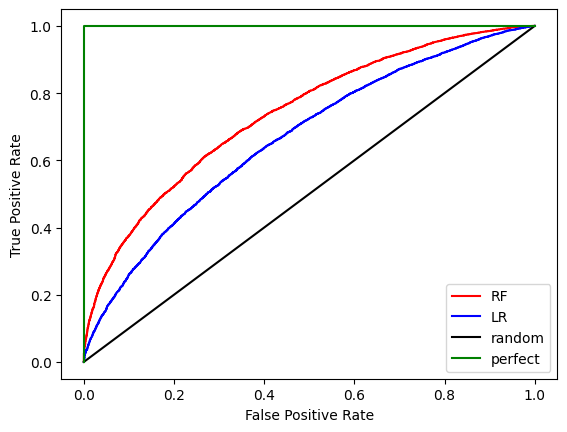

In [172]:
import matplotlib.pyplot as plt

plt.plot(fpr_RF, tpr_RF,'r-',label = 'RF')
plt.plot(fpr_LR,tpr_LR,'b-', label= 'LR')
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

There are a couple things that we can observe from this figure. 
 - A model that randomly guesses the label will result in the black line and you want to have a model that has a curve above this black line. 
- An ROC that is farther away from the black line is better, so RF (red) looks better than LR (blue).
- Although not seen directly, a low threshold results in a point in the top right and a high threshold results in a point in the bottom left. This means as you decrease the threshold you get higher TPR at a cost of higher FPR.

To analyze the performance, we will use the area-under-curve metric.

In [173]:
from sklearn.metrics import roc_auc_score

auc_RF = roc_auc_score(df.actual_label.values, df.model_RF.values)
auc_LR = roc_auc_score(df.actual_label.values, df.model_LR.values)

print('AUC RF:%.3f'% auc_RF)
print('AUC LR:%.3f'% auc_LR)

AUC RF:0.738
AUC LR:0.666


As you can see, the area under the curve for the RF model is better than the LR. 

When I plot the ROC curve, I like to add the AUC to the legend as shown below. 

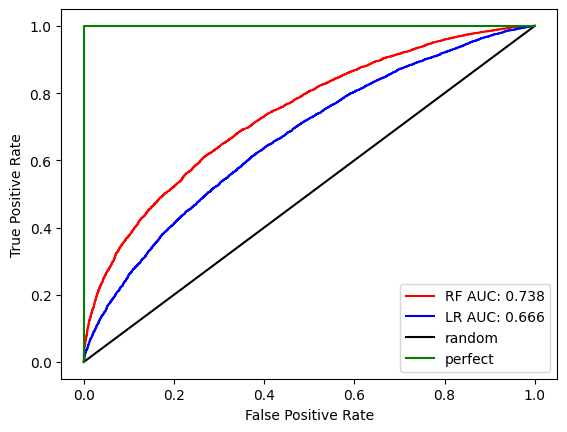

In [174]:
import matplotlib.pyplot as plt

plt.plot(fpr_RF, tpr_RF,'r-',label = 'RF AUC: %.3f'%auc_RF)
plt.plot(fpr_LR,tpr_LR,'b-', label= 'LR AUC: %.3f'%auc_LR)
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Overall, in this toy example the model RF wins with every performance metric. 

# Conclusion

In predictive analytics, when deciding between two models it is important to pick a single performance metric. 

As you can see here, there are many that you can choose from (accuracy, recall, precision, f1-score, AUC, etc). 

Ultimately, you should use the performance metric that is most suitable for the business problem at hand.

Many data scientists prefer to use the AUC because it does not require selecting a threshold and helps balance true positive rate and false positive rate.  